# Setup / Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import required packages
from tqdm.notebook import tqdm    # for fancy progress bar
from PIL import Image             # PILLOW for working with images
import pandas as pd               # pandas for working and manipulating data
import os                         # for performing
import numpy as np                # for working with numerical arrays
import matplotlib.pyplot as plt   # for matrix plots

# import tensorflow and required packages for nueral network training
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input, MaxPooling2D


In [ ]:
# Define a custom function to load the images
def load_data(folder):
    images = []
    for file in tqdm(os.listdir(folder)):        # loop through files in 'folder'
        file_id = file.replace('.png', '')       # remove the extension .png
        image = Image.open(                      # Open Image and assign it to an object
            os.path.join(folder, file)
        ).convert('LA').resize((256, 256))       # Resize iamges to a constant (256,256) size and convert to 8-bit greyscale image with alphas
        arr = np.array(image)                    # Create an array of image
        images.append(
            (int(file_id), arr)                  # Append file ids for correlation with the ground truth while training
        )
    images.sort(key=lambda i: i[0])              # Sort the converted images starting from 0th image in ascending order
    return np.array([v for _id, v in images])    # return the created array of images.


# Load the images from the train folder and store them in x for training
x_train = load_data('/content/drive/MyDrive/cisc/A3/folder/train/')

# Load the input labels for training
y_train = pd.read_csv('/content/drive/MyDrive/cisc/A3/folder/y_train.csv')['infection']

  0%|          | 0/487 [00:00<?, ?it/s]

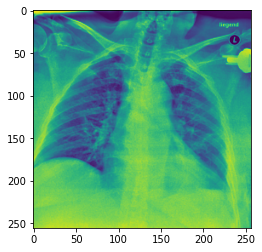

In [ ]:
# check image
plt.imshow(x_train[0, :, :, 0])

**Template Description:**

The template begins experimenting with a model consisting of 2 Fully Connected layer with an output layer and tries to optimize the ouput by looking at different metrics and refining it further.



One way to tune the hyperparameters for this template would be to try between different values and and compare the training and validation accuracies to see which one performs best while ensuring the model does not overfit.


The search space for this problem would include searching the image (a flattened version of (256,256) imge) to find whether the test image has features that correspond to Infection = 1 or 0.


The template calculates loss between true and predicted labels using Binary Cross Entropy and the metrics detemine how accurate the model's output is compared to the labels. These metrics (accuracies) and loss values can be used to determine whether the set of hyperparaeters is good or not.  

In [ ]:
# Define a build method to create the architecture of the model

def build():
    img_in = Input(shape=(256, 256, 2))                     # create an object to initiate a tensor that serves as the input to the model, of shape (256, 256) and 2 channels
    flattened = Flatten()(img_in)                           # Flatten the multidimensional input into single dimenion to pass to the FC layer
    fc1 = Dense(64)(flattened)                              # Pass the flattened image to create First FC layer with an output dimension of 64
    fc2 = Dense(32)(fc1)                                    # Create a 2nd FC from the output of FC1 with a dimension of 32
    output = Dense(1, activation = 'sigmoid')(fc2)          # Generate the output either 0 or 1 and use sigmoid as activation function
    model = tf.keras.Model(inputs=img_in, outputs=output)   # Bind the 'model' object with 'input' and 'output' objects as training and inference features
    return model                                            # Return to calling function


model = build()                                             # Assign the model from the architecture
model.compile(                                              # Configure model with the designed layers to prepare for training
        optimizer=tf.keras.optimizers.Adam(),               # Use Adam Opitmizer
        loss='binary_crossentropy',                         # Compute model loss based on CrossEntropy
        metrics=['BinaryAccuracy', 'AUC']                   # Use two metrics for checking the performance of the model
        )

model.summary()                                             # Output the summary - layers, parameters etc. for current model



Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 256, 256, 2)]     0         
                                                                 
 flatten_14 (Flatten)        (None, 131072)            0         
                                                                 
 dense_66 (Dense)            (None, 64)                8388672   
                                                                 
 dense_67 (Dense)            (None, 32)                2080      
                                                                 
 dense_68 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8,390,785
Trainable params: 8,390,785
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 30                                         # No. of epochs to train the model for
batch_size = 64                                     # Batch size (Number or images to work on in 1 epoch)


# Create an object to hold the history of losses and accuracy reported in each epoch.
# Then call the .fit() and pass the paramters to begin training

history = model.fit(x = x_train,                    # pass the training dat
                    y = y_train,                    # pass the target data / correct labels
                    batch_size = batch_size,        # pass the batch size
                    validation_split=0.3,           # create a split from the training set for validating the training: here, 70/30 split
                    epochs=epochs                   # No. of epochs to run the traininig for.
                    )                               # umm... closing bracket?


Epoch 1/30
6/6 [==============================] - 2s 182ms/step - loss: 57861.2422 - binary_accuracy: 0.6294 - auc: 0.5169 - val_loss: 62864.1211 - val_binary_accuracy: 0.3469 - val_auc: 0.5000
Epoch 2/30
6/6 [==============================] - 1s 121ms/step - loss: 50282.6992 - binary_accuracy: 0.3882 - auc: 0.4743 - val_loss: 56274.7070 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 3/30
6/6 [==============================] - 1s 197ms/step - loss: 45837.2812 - binary_accuracy: 0.6765 - auc: 0.5000 - val_loss: 8318.1699 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 4/30
6/6 [==============================] - 1s 141ms/step - loss: 23802.6465 - binary_accuracy: 0.3647 - auc: 0.4711 - val_loss: 9383.4697 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 5/30
6/6 [==============================] - 1s 123ms/step - loss: 19119.6504 - binary_accuracy: 0.6765 - auc: 0.5000 - val_loss: 20492.3984 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 6/30
6/6 [================

In [ ]:
#Testing the model performance

x_test = load_data('/content/drive/MyDrive/cisc/A3/folder/test/')   # Load the test dataset for testing the model on unseen data
y_test = model.predict(x_test)                                      # Generate output prediction for the test set.

  0%|          | 0/210 [00:00<?, ?it/s]

7/7 [==============================] - 1s 33ms/step


In [ ]:
# Prepare a submission by creating a dataframe and adding id + labels and converting to csv.
# Disabled for now to prevent creating unnecessary submissions.

# y_test_df = pd.DataFrame()
# y_test_df['id'] = np.arange(len(y_test))
# y_test_df['infection'] = y_test.astype(float)
# y_test_df.to_csv('/content/drive/MyDrive/cisc/A3/submission.csv', index=False)

# Fine Tuning

We further fine tune thr model by adding a layer after the FC2.

This is done hoping that a more gradual progression of Fully connected neural network would aid in learning more features.

It also features following changes to hyperparams:

* The activation was changed to 'relu'
* Trained for more epochs
* Different batch size
* ASMGrad version of Adam optimizer

In [ ]:
# Define a build method to create the architecture of the model

def build():
    img_in = Input(shape=(256, 256, 2))                     # create an object to initiate a tensor that serves as the input to the model, of shape (256, 256) and 2 channels
    flattened = Flatten()(img_in)                           # Flatten the multidimensional input into single dimenion to pass to the FC layer
    fc1 = Dense(64)(flattened)
    fc2 = Dense(32)(fc1)
    fc3 = Dense (16)(fc2)                                   # Add another Fully Connected Layer with 16 output
    output = Dense(1, activation = 'sigmoid')(fc3)          # Change activation to relu
    model = tf.keras.Model(inputs=img_in, outputs=output)   # Bind the 'model' object with 'input' and 'output' objects as training and inference features
    return model                                            # Return to calling function


model = build()                                             # Assign the model from the architecture
model.compile(                                              # Configure model with the designed layers to prepare for training
        optimizer=tf.keras.optimizers.Adam(amsgrad=True),    # SGD with custom learning rate and momentum
        loss='binary_crossentropy',                         # Compute model loss based on CrossEntropy
        metrics=['BinaryAccuracy']                          # Use only one metric
        )


In [ ]:
epochs = 80                                         # No. of epochs to train the model for
batch_size = 128                                     # Batch size (Number or images to work on in 1 epoch)


# Create an object to hold the history of losses and accuracy reported in each epoch.
# Then call the .fit() and pass the paramters to begin training

history = model.fit(x = x_train,                    # pass the training dat
                    y = y_train,                    # pass the target data / correct labels
                    batch_size = batch_size,        # pass the batch size
                    validation_split=0.3,           # create a split from the training set for validating the training: here, 70/30 split
                    epochs=epochs                   # No. of epochs to run the traininig for.
                    )


In [ ]:
#Testing the model performance

x_test = load_data('/content/drive/MyDrive/cisc/A3/folder/test/')   # Load the test dataset for testing the model on unseen data
y_test = model.predict(x_test)                                      # Generate output prediction for the test set.

  0%|          | 0/210 [00:00<?, ?it/s]

7/7 [==============================] - 0s 40ms/step


In [ ]:
# Trying to use the tensorFlow evaluate method to get the test accuracy,
# but since we don;t have grount truth labels for the test set, I don;t know how to evaluate it.
# The documents suggests evaluate(test_input, target_data) but we don't have target labels for test set. Am I missing something?

# model.evaluate(y_test, )

**Observation**


Add ing another layer and Training for more epoch slightly improved the performace. While it is not a significant difference, the final loss values are much lower despite using the same metric.

What is more noteworthy is that the average Train accuracy and Validation accuracy follow each other closely (without a large gap) which suggests further training would yield better results wihtout overfitting.


# Applying Data Augmentation

The size of dataset is really small.

Every ML model benefits from more data, so in hopes of increasing the data and getting better performance, we apply following data augmentations.

* Randomly Cropping to slightly lower size. (The reason is, there is a lot of extra studd along the borders of the X-Ray images that is not relevant to detecting COVID; like the bones of the shoulder, neck etc. If we randomly crop only by a small amount, most of the central chest would still be in the image)

* Random Rotation: Another augmentation to slightly changet the image wihtout messing up the feature set

* Random Flip: There are both R and L X-Rays. Flipping them still keeps the fibrous elements in the lungs visible while adding augmentation.

In [ ]:
# Import Data augmentation modules
from tensorflow.keras.layers import RandomCrop, RandomFlip, RandomRotation


# data_augmentation = tf.keras.Sequential([RandomCrop(230,230), RandomRotation(0.1), RandomFlip("horizontal_and_vertical")])


# Applying data Augmentatin by creating an object that stacks all the augmentations into 1 sequence
data_augmentation = tf.keras.Sequential([RandomCrop(230,230), RandomFlip("horizontal_and_vertical")])

# Creating a model using the built in Sequential modeule which is an alternative to the build() method.
# It stacks the operations for the model architecture similar to how it was done previously
m = tf.keras.Sequential([
  data_augmentation,
  Input(shape=(256,256,2)),
  Flatten(),
  Dense(64),
  Dense(32),
  Dense(16),
  Dense(1, activation = 'sigmoid')
])

m.compile(
        optimizer=tf.keras.optimizers.Adam(amsgrad = True),
        loss='binary_crossentropy',
        metrics=['BinaryAccuracy']
        )

In [ ]:
epochs = 50                                         # No. of epochs to train the model for
batch_size = 64                                     # Batch size (Number or images to work on in 1 epoch)

history = m.fit(x = x_train,                        # pass the training dat
                    y = y_train,                    # pass the target data / correct labels
                    batch_size = batch_size,        # pass the batch size
                    validation_split=0.3,           # create a split from the training set for validating the training: here, 70/30 split
                    epochs=epochs                   # No. of epochs to run the traininig for.
                    )


In [ ]:
#Testing the model performance

x_test = load_data('/content/drive/MyDrive/cisc/A3/folder/test/')   # Load the test dataset for testing the model on unseen data
y_test = m.predict(x_test)                                      # Generate output prediction for the test set.

  0%|          | 0/210 [00:00<?, ?it/s]

7/7 [==============================] - 0s 37ms/step


**Observation**

Interesting results.

The accuracy reported in each epoch is much more randomized than previous runs.

I think this could be due to randomness in the input set.

# Swapping CNNs

In this block, we train the model using CNNs and applying MaxPooling layers.


The CNN layer helps learn the feature representations faster, but outputs a feature set that cannot be directly used for predicting between 1 or 0.

Hence we still need to flatten the output and apply FC like in previous steps to get the final required prediction.

In [ ]:
# Creating a sequential model to implement the CNN

m = Sequential([
  Input(shape=(256,256,2)),
  Conv2D(16, 5),                                              # Create a 2D Convolution with 5x5 kernel size and 16 channels
  MaxPooling2D(),                                             # Create a Max Pooling layer to reduce the dimensions for the FC layer
  Flatten(),
  Dense(64),
  Dense(32),
  Dense(1, activation = 'sigmoid')
])

m.compile(
        optimizer=tf.keras.optimizers.Adam(amsgrad = True),
        loss='binary_crossentropy',
        metrics=['BinaryAccuracy']
        )

m.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 252, 252, 16)      816       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 126, 126, 16)     0         
 g2D)                                                            
                                                                 
 flatten_63 (Flatten)        (None, 254016)            0         
                                                                 
 dense_219 (Dense)           (None, 64)                16257088  
                                                                 
 dense_220 (Dense)           (None, 32)                2080      
                                                                 
 dense_221 (Dense)           (None, 1)                 33        
                                                     

In [ ]:
epochs = 25                                         # No. of epochs to train the model for
batch_size = 64                                     # Batch size (Number or images to work on in 1 epoch)

history = m.fit(x = x_train,                        # pass the training dat
                    y = y_train,                    # pass the target data / correct labels
                    batch_size = batch_size,        # pass the batch size
                    validation_split=0.3,           # create a split from the training set for validating the training: here, 70/30 split
                    epochs=epochs                   # No. of epochs to run the traininig for.
                    )


Epoch 1/25
6/6 [==============================] - 16s 3s/step - loss: 48667.7422 - binary_accuracy: 0.4765 - val_loss: 50589.6172 - val_binary_accuracy: 0.6531
Epoch 2/25
6/6 [==============================] - 21s 4s/step - loss: 28270.4590 - binary_accuracy: 0.6382 - val_loss: 31343.0879 - val_binary_accuracy: 0.3537
Epoch 3/25
6/6 [==============================] - 15s 2s/step - loss: 13363.6074 - binary_accuracy: 0.5647 - val_loss: 16432.8633 - val_binary_accuracy: 0.6531
Epoch 4/25
6/6 [==============================] - 15s 2s/step - loss: 8838.5312 - binary_accuracy: 0.6618 - val_loss: 8128.5322 - val_binary_accuracy: 0.3537
Epoch 5/25
6/6 [==============================] - 19s 3s/step - loss: 4151.5513 - binary_accuracy: 0.5088 - val_loss: 4805.6528 - val_binary_accuracy: 0.6531
Epoch 6/25
6/6 [==============================] - 15s 2s/step - loss: 3985.6062 - binary_accuracy: 0.6765 - val_loss: 838.8230 - val_binary_accuracy: 0.6599
Epoch 7/25
6/6 [==============================]

In [ ]:
#Testing the model performance

x_test = load_data('/content/drive/MyDrive/cisc/A3/folder/test/')   # Load the test dataset for testing the model on unseen data
y_test = m.predict(x_test)                                      # Generate output prediction for the test set.

**Observation**

The model's performance seems to be bumping around a lot.

However, the final loss values are low which looks good.

# Tuning the CNN Model - Going Deeper

The performance for the simple 1 layer CNN suggests further tuning could get better results.

In this block we try to make changes to some of the hyperparams and add more layers to see if that helps improve the performance even slightly.

* Added more layers - Gradually start at 5x5 then 3x3.
* Added Activation
* Changed the FC Layer
* Using Dropout

In [ ]:
# Creating a sequential model to implement the CNN

# Create Convolutions starting from 5x5 down to 3x3 and a dropout of 0.5

m = Sequential([
  Input(shape=(256,256,2)),
  Conv2D(32, 5, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.5),                                             # Using a dropout to prevent overfitting
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.5),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128),
  Dropout(0.2),
  Dense(1, activation = 'sigmoid')
])

m.compile(
        optimizer=tf.keras.optimizers.Adam(amsgrad = True),
        loss='binary_crossentropy',
        metrics=['Accuracy']                                        # Using a different metric
        )

m.summary()

In [ ]:
epochs = 25                                         # No. of epochs to train the model for
batch_size = 64                                     # Batch size (Number or images to work on in 1 epoch)

history = m.fit(x = x_train,                        # pass the training dat
                    y = y_train,                    # pass the target data / correct labels
                    batch_size = batch_size,        # pass the batch size
                    validation_split=0.3,           # create a split from the training set for validating the training: here, 70/30 split
                    epochs=epochs                   # No. of epochs to run the traininig for.
                    )


Epoch 1/25
6/6 [==============================] - 55s 9s/step - loss: 5446.6040 - Accuracy: 0.4824 - val_loss: 55.9753 - val_Accuracy: 0.6531
Epoch 2/25
6/6 [==============================] - 53s 9s/step - loss: 208.9977 - Accuracy: 0.6765 - val_loss: 3.4582 - val_Accuracy: 0.3537
Epoch 3/25
6/6 [==============================] - 56s 9s/step - loss: 25.3001 - Accuracy: 0.4941 - val_loss: 3.0359 - val_Accuracy: 0.6531
Epoch 4/25
6/6 [==============================] - 58s 10s/step - loss: 10.5087 - Accuracy: 0.6765 - val_loss: 0.6162 - val_Accuracy: 0.6531
Epoch 5/25
6/6 [==============================] - 51s 9s/step - loss: 2.0190 - Accuracy: 0.6471 - val_loss: 0.7001 - val_Accuracy: 0.3537
Epoch 6/25
6/6 [==============================] - 49s 8s/step - loss: 1.0772 - Accuracy: 0.5765 - val_loss: 0.7032 - val_Accuracy: 0.3469
Epoch 7/25
6/6 [==============================] - 50s 8s/step - loss: 0.9534 - Accuracy: 0.5471 - val_loss: 0.7037 - val_Accuracy: 0.3469
Epoch 8/25
6/6 [=========

In [ ]:
#Testing the model performance

x_test = load_data('/content/drive/MyDrive/cisc/A3/folder/test/')   # Load the test dataset for testing the model on unseen data
y_test = m.predict(x_test)                                      # Generate output prediction for the test set.

**Observation**

I think this model performed better; but the accuracy values are different since I tried to change the metric to use only 'Accuracy' instead of Binary Accuracy.

Overall, model took really long and I was running short on time for more training.

Would be worth investigating final results.

# Trying a pre-trained Model -- Tranfer Learning

This block will striclt yfollow the original TensorFlow for tranfer leaarning using pre trained model linked in the assignment.


Ref: https://www.tensorflow.org/tutorials/images/transfer_learning

I have chosen to use ConvNext since I have read it is a good model.


--Edit: ConvNext showed some error, so switched to MobileNetV2 as used in original tutorial.

In [ ]:
# Creating processes to facilitate the Pretrained Model pipeline

base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3))           # Create the base model to be used, using the pretrained model
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()                 # Create a classification head to generate pre
prediction_layer = tf.keras.layers.Dense(1)                                     # Add the final FC to create a single value predictor.

14536120/14536120 [==============================] - 0s 0us/step


In [ ]:
# Create the Model pipeline by appending previously created processes

inputs = tf.keras.Input(shape=(256,256,3))
x = base_model(inputs, training=False)                # Training set to false for base model (PreTrained) model since we only want to use it for our predictions
outputs = prediction_layer(x)
mc = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.001                                                # Increased base learning rate
mc.compile(optimizer=tf.keras.optimizers.Adam(),                        # Stock settings for original tutorial.
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['BinaryAccuracy'])

In [ ]:
history = mc.fit(x = x_train,                        # pass the training dat
                    y = y_train,                    # pass the target data / correct labels
                    batch_size = 64,
                    epochs=10                   # No. of epochs to run the traininig for.
                    )

Epoch 1/10


ValueError: ignored